# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Question 1 Code:**

In [30]:
import pandas as pd

#1.1 code
df = pd.read_csv("./data/airbnb_hw.csv")

df['Price'] = df['Price'].astype(str).str.replace('$', '').str.replace(',', '')
df['Price'] = df['Price'].str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
missing_values = df['Price'].isna().sum()
print(f"Number of missing values in the Price column: {missing_values}")


#1.2 code:
df = pd.read_csv('./data/mn_police_use_of_force.csv')

df['subject_injury'] = df['subject_injury'].astype('category')
missing_proportion = df['subject_injury'].isna().mean()
cross_tab = pd.crosstab(df['subject_injury'], df['force_type'])

print(f"Proportion of missing values in Subject Injury: {missing_proportion}")
print("\nCross-tabulation of 'subject_injury' and 'force_type':")
print(cross_tab)



Number of missing values in the Price column: 0
Proportion of missing values in Subject Injury: 0.7619342359767892

Cross-tabulation of 'subject_injury' and 'force_type':
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172  


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016/01/11 19:02:01,Theft - Report Only,No,SHOPLF,NaN,Bodily Force,Joint Lock,Native American,Female,35.0,Tensed,1,Downtown West
96,2016/01/11 23:39:46,Robbery of Biz In Progress,Yes,ROBPAG,Yes,Bodily Force,Body Weight to Pin,Black,Male,36.0,Verbal Non-Compliance,2,Como
97,2016/01/11 23:39:46,Robbery of Biz In Progress,Yes,ROBPAG,Yes,Bodily Force,Joint Lock,Black,Male,36.0,Verbal Non-Compliance,2,Como
98,2016/01/11 23:39:46,Robbery of Biz In Progress,Yes,ROBPAG,Yes,Improvised Weapon,Flashlight,Black,Male,36.0,Verbal Non-Compliance,2,Como


**Question 1.1:**
I cleaned the Price column by first converting it to a string and removing the dollar sign and commas to ensure all prices were in a standard numeric format. Then, I stripped any extra whitespaces and converted the values to numbers, using errors='coerce' to handle any invalid entries. After cleaning, there were zero missing values, meaning all prices were successfully converted to a numeric format.

**Question 1.2**
I cleaned the subject_injury column by converting it to a categorical type and checking for missing values. I found that 76.2% of the values were missing, which is a big concern because it means most cases do not have clear injury records. The cross-tabulation shows that when force is used, injuries are sometimes recorded, but in many cases, there is no injury reported. However, the high number of missing values raises some questions about whether injuries were not recorded properly, which could indicate gaps in data collection or reporting.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [41]:
!python --version
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install xlrd


Python 3.12.0



[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


**Question 2 Code:**

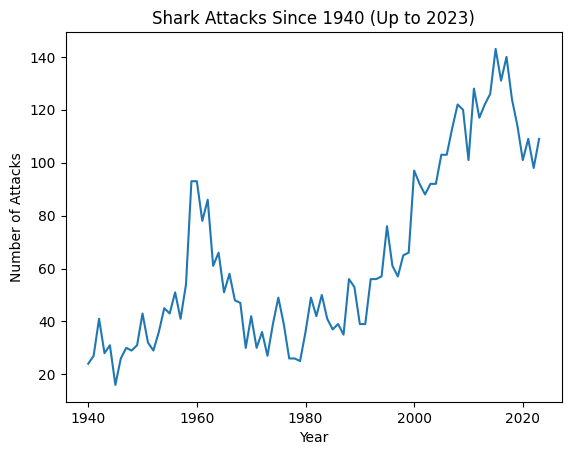

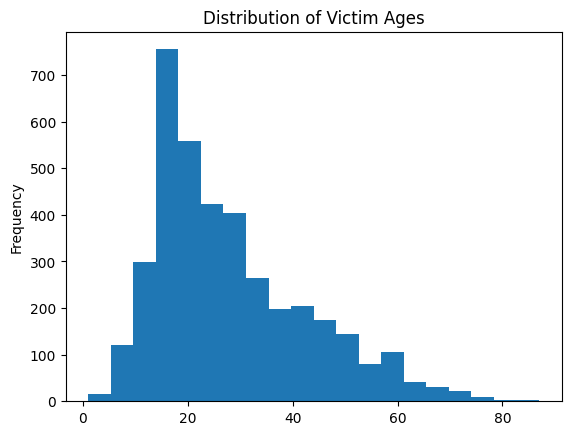

0.8027181688125894
0.7369098712446351
0.10014306151645208


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23.0,...,not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40.0,...,reportedly tiger or bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28.0,...,great white shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69.0,...,reportedly a tiger shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48.0,...,reportedly a tiger shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-12-28 00:00:00,2024.0,Unprovoked,Australia,Queensland,Humpy Island Great Keppel Island,Spearfishing,Luke Walford,M,40.0,...,unknown,Todd Smith Glen Folkard ABC News: The North We...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-12-02 00:00:00,2024.0,Unprovoked,Australia,Queensland,Curtis Island Near Gladstone QLD central coast,Spearfishing,Not stated,M,NaN,...,not stated,Glen Folkard GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-12-01 00:00:00,2024.0,Unprovoked,Australia,Western Australia,Greenough River Mouth Beach Cape Burney 12km s...,Surfing,James Sweetman (child),M,NaN,...,1m shark species unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-11-30 00:00:00,2024.0,Unprovoked,Thailand,Phang Nga Province,Khao Lak Beach,Swimming,Elke Maier,F,57.0,...,unknown,Kevin McMurray Tracking Sharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-11-19 00:00:00,2024.0,Unprovoked,New Zealand,Bay of Waitangi,Chatham Islands,Diving,Jade Kahukore-Dixon,M,24.0,...,great white shark,Glen Folkhard: Todd Smith: Andy Currie Kevin M...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
#2.1
df = pd.read_excel('../data/GSAF5.xls')
#2.2
df = df.dropna(axis=1, how='all')
#2.3
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
recent_attacks = df[df['Year'] >= 1940]
yearly_counts = recent_attacks['Year'].value_counts().sort_index()
filtered_yearly_counts = yearly_counts[yearly_counts.index <= 2023]
filtered_yearly_counts.plot(kind='line', title='Shark Attacks Since 1940 (Up to 2023)', xlabel='Year', ylabel='Number of Attacks') #increasing
plt.show()
#2.4
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
valid_ages = df.dropna(subset=['Age'])
plt.figure()
valid_ages['Age'].plot(kind='hist', bins=20, title='Distribution of Victim Ages')
plt.show()
#2.5
male_victims = df[df['Sex'] == 'M'].shape[0]
total_victims = df.shape[0]
proportion_male = (male_victims / total_victims)
print(proportion_male) #0.8027181688125894

#2.6
def clean_type(x):
    if isinstance(x, str):
        if 'unprovoked' in x.lower():
            return 'Unprovoked'
        elif 'provoked' in x.lower():
            return 'Provoked'
    return 'Unknown'

df['Type'] = df['Type'].apply(clean_type)
unprovoked_count = (df['Type'] == 'Unprovoked').sum()
total_attacks = df.shape[0]
percent_unprovoked = unprovoked_count / total_attacks #0.7369098712446351
print(percent_unprovoked)

#2.7
def clean_fatal(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).strip().upper()
    if 'Y' in x:
        return 'Y'
    elif 'N' in x:
        return 'N'
    else:
        return 'Unknown'

df['Fatal Y/N'] = df['Fatal Y/N'].apply(clean_fatal)

#2.9
df.columns = df.columns.str.strip()
df['Species'] = df['Species'].str.lower().str.strip()
white_shark_attacks = df[df['Species'].str.contains('white shark', na=False)]
total_attacks = len(df)
white_attack_num = len(white_shark_attacks)
white_shark_percent = white_attack_num / total_attacks #0.10014306151645208
print(white_shark_percent)

df.head(10)


**Q2.3** Shark attacks since 1940 have generally been increasing over time. There are some fluctuations present, but the overall trend displays a gradual increase in attacks.

**Q2.5** About 80.3% of shark attack victims are male.

**Q2.6** Around 73.7% of attacks are unprovoked, meaning most incidents happen without us disturbing the shark first.

**Q2.8** Men are more likely to be victims of unprovoked attacks than women. Unprovoked attacks are more likely to be fatal than provoked ones. Male victims also have a higher fatality rate compared to female victims. The data collected during this assignment makes me fearful of sharks as most of their attacks are unprovoked.

**Q2.9** About 10% of shark attacks are from white sharks.  They are a significant but not dominant species in attack incidents.*

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

The most recent U.S. Census in 2020 gathered data on race by surveying people using an online questionnaire to choose one or more races from a list of options. This includes a variety of categories such as White, African American, Asian, Latino, and Indigenous, and this allows for a better understanding of the country's demographics. Demographic information can help provide a basis for policies regarding equality, health care, and education. This data plays an important role in ensuring fair political representation and allocating resources whereever they're needed the most. Having high data quality is essential because poor or incomplete data can draw inaccurate conclusions that can affect decisions that impact people's lives. Examples of this can include how government funds are distributed or in the context of machine learning, having accurate and non-biased policing algorithms.

The 2020 Census improved race data collection by allowing multiple selections for White and African American communities by having detailed subcategories such as Irish or Jamaican but still failed to fully capture racial diversity. Many Middle Eastern and North African groups were classified as "White," misrepresenting their identities. I believe that future surveys should have a combined race and ethnicity question to ensure that subcategories are not lost and misrepresented. Similarly, the Census only asked about sex as male or female, thus excluding gender identity. While smaller surveys collect this data, the main Census should adopt an approach toask about sex assigned at birth followed by a another question on current gender identity to include transgender and nonbinary individuals. Expanding these practices to other surveys would improve representation and improve data quality.


Cleaning data on things like race, gender, and sexual identity is difficult because mistakes can lead to unfair treatment or bias. Missing values often occur because some groups don’t trust how their information and will be used. For example, if many people from a minority group leave a race question blank due to distrust, deleting those responses could make the data less representative and lead to unfair policies. Guessing the missing data, such as assuming race based on where someone lives, can make this problem worse, as this could lead to inaccurate decisions. A better approach would be to acknowledge the missing data, analyze patterns to understand why it’s missing, and use careful statistical methods while ensuring transparency and fairness. An algorithm that fills in missing values for race, gender, sex, or sexuality could be risky because it might make wrong assumptions and reinforce biases. If it uses things like names or locations to guess, it could stereotype people and erase their real identities. It could also be misused, like targeting certain groups unfairly in hiring, policing, or marketing. To avoid harm, there would need to be strict rules, transparency, and input from diverse communities to make sure the algorithm is fair and respectful.